In [101]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

In [294]:
#load data
data_path = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")
df = pd.read_csv(data_path)

In [295]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [296]:
#check for nulls and length of data
df.count()

10k          31984
name         31984
division     31984
25k          31984
gender       31984
age          31984
official     31984
bib          31984
genderdiv    31984
ctz           1244
35k          31984
overall      31984
pace         31984
state        29408
30k          31984
5k           31984
half         31984
20k          31984
country      31984
city         31983
40k          31984
dtype: int64

In [297]:
df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [298]:
#what is ctz?
df.ctz.dropna()

27       KOR
36       MEX
59       MEX
101      ECU
110      CPV
112      AUS
116      CAN
119      NZL
120      ECU
125      ROU
149      CAN
176      GER
177      GER
187      DEN
202      GBR
250      GBR
298      CAN
310      FRA
316      GBR
342      IRL
388      IRL
406      MEX
420      JPN
503      GBR
515      RSA
528      ITA
545      GUA
575      GBR
608      AUS
621      ITA
        ... 
31443    NED
31453    SWE
31457    GBR
31511    KOR
31512    HKG
31519    GBR
31524    USA
31525    RSA
31546    BEL
31550    GBR
31552    USA
31561    ITA
31563    ITA
31597    JPN
31611    FRA
31618    CHN
31628    CHN
31630    CHN
31631    CHN
31634    CHN
31640    IRL
31644    COL
31656    CHN
31657    CHN
31659    CHN
31661    CHN
31843    IRL
31875    IRL
31902    POR
31955    ZIM
Name: ctz, dtype: object

In [299]:
#3 digit country letter code.. dont know why so much data is missing so drop it
df = df.drop('ctz', 1)

In [300]:
#nulls in state probably foreign 
df.loc[df.isnull().any(axis=1), df.isnull().any()]

,state,city
0,NaN,Fukuoka
1,NaN,Eldoret
2,NaN,Paarl
3,NaN,Shoa
4,NaN,Nogata Fukuoka
5,NaN,Nandi
6,NaN,Neuenkirch
7,NaN,Addis Ababa
8,NaN,Isahaya
10,NaN,Marakwet


In [301]:
#assume all missing states are foreign, copy country for those values
df['state'].fillna(df.country, inplace=True)

In [302]:
#check last null
df[df.isnull().any(axis=1)]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
14553,50.03,"Caires, Maria G.",243,127.08,F,54,226.27,16645,4730,184.87,14260,8.63,BRA,155.30,25.22,106.45,100.78,BRA,NaN,213.47


In [303]:
#normal entry excluding the null. lets look at the country associated
df.city[df['country'] == 'BRA'].groupby(df.city).count()

city
Belo Horizonte            6
Belo Horizonte, Mg.       1
Belo Horizonte/Mg         1
Brasilia                  2
Brasília                  1
Campinas                  1
Cuiabá, Mt                1
Curitiba                  2
Florianopolis             1
Goiania                   3
Goiânia                   1
Guarulhos                 1
Ijui                      1
Indaiatuba                2
Jundiai                   3
Jundiai S.p.              1
Maceio                    1
Maringa                   1
Natal                     2
Natal/Rn                  1
Piracicaba                1
Porto Alegre              2
Rio De Janeiro            9
Rio De Janeiro (rj)       1
Rio De Janeiro, Rj        1
Salvador                  1
Sao Bernardo Do Campo     3
Sao Paulo                32
Sao Paulo Sp              1
São Paulo                 1
São Paulo Sp              1
Name: city, dtype: int64

In [304]:
#assume its most common
df.fillna('Sao Paulo', inplace=True)

In [305]:
df.isnull().sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

In [306]:
pd.set_option('display.max_columns', 500)
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,JPN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,KEN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,RSA,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,ETH,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,JPN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [307]:
#name is useless for statistical analysis
df = df.drop('name', 1)

In [308]:
#bib is an identifier on costume. also useless
df = df.drop('bib', 1)

In [309]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,M,47,85.25,8,71.40,8,3.27,JPN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,KEN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,M,41,80.60,1,67.42,1,3.08,RSA,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,ETH,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,M,40,81.23,2,67.83,2,3.10,JPN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [310]:
#need all numerical data
l = ['gender', 'state', 'country', 'city']
for x in l:
    le = preprocessing.LabelEncoder()
    le.fit(df[x])
    df[x] = le.transform(df[x])
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,62,59.18,8.02,39.72,37.65,41,1800,80.43
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,63,99.33,16.22,69.47,65.83,42,1514,132.10
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,113,56.45,7.75,38.03,36.10,59,3919,76.10
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,39,99.33,16.20,69.47,65.83,26,4786,132.95
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,62,57.03,8.02,38.60,36.58,41,3643,76.72


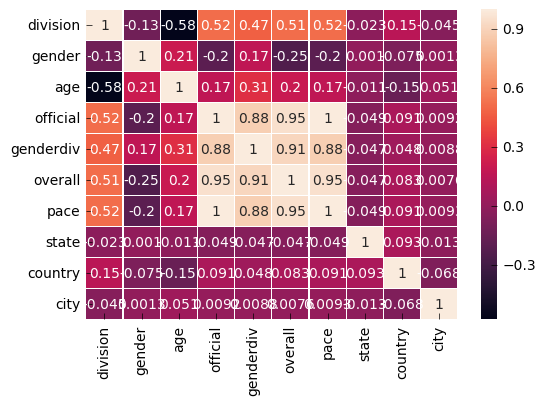

In [311]:
sns.heatmap(df.corr(), linewidths=.1, annot=True)
plt.show()

In [312]:
#not showing the times for 5k and other specific legs. make sure int
df.dtypes

10k           object
division       int64
25k           object
gender         int64
age            int64
official     float64
genderdiv      int64
35k           object
overall        int64
pace         float64
state          int64
30k           object
5k            object
half          object
20k           object
country        int64
city           int64
40k           object
dtype: object

In [313]:
#wont let me convert to float, likely some entries that are not numbers
df['5k'].groupby(df['5k']).count()

5k
-        52
10.08     1
10.10     1
10.12     4
10.15     1
10.17     1
10.52     1
10.67     1
11.27     1
11.55     1
11.73     1
12.10     1
12.12     1
12.90     1
13.32     1
13.93     1
15.15     2
15.17     4
15.18     8
15.20     3
15.23     1
15.25     1
15.28     1
15.32     1
15.40     1
15.42     1
15.58     3
15.63     1
15.65     1
15.68     2
         ..
46.98     1
48.00     1
48.15     1
48.28     1
48.83     1
49.63     1
51.98     1
55.00     1
59.75     1
66.35     1
7.75      1
8.00      1
8.02      4
8.38      2
8.40      1
8.67      2
8.68      3
8.92      1
8.93      2
8.98      2
86.95     1
9.12      1
9.25      3
9.33      1
9.40      2
9.65      1
9.72      2
9.77      1
9.93      1
9.97      1
Name: 5k, dtype: int64

In [314]:
df[df['5k'] == '-']

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
836,38.28,2701,100.75,1,32,194.87,4672,150.93,5252,7.43,9,124.67,-,83.70,79.12,2,1354,181.07
1333,44.55,2692,112.18,1,28,194.68,4633,160.52,5206,7.43,95,136.08,-,94.65,89.68,74,56,184.47
3189,-,647,-,1,47,195.82,4815,160.48,5463,7.48,43,-,-,-,-,74,226,184.62
5762,42.58,626,108.28,1,41,188.62,3552,154.42,3862,7.20,110,130.85,-,90.52,85.80,11,3357,178.27
6241,42.28,37,106.65,0,41,189.32,331,153.13,3996,7.23,70,129.08,-,89.47,84.78,74,3518,178.15
7417,-,1650,-,0,42,264.28,9412,218.07,22540,10.08,99,-,-,-,-,11,5322,251.72
8369,45.30,2400,117.35,1,47,268.72,13467,189.88,23252,10.25,61,147.28,-,97.47,92.33,40,1946,245.72
8419,-,2150,117.15,1,42,273.35,13794,205.55,23958,10.43,80,159.15,-,94.02,-,74,2936,251.63
9547,-,129,-,0,36,181.80,153,-,2649,6.95,18,-,-,-,-,9,4629,164.78
13436,-,1905,122.85,1,54,260.58,12860,186.47,21963,9.95,20,147.72,-,103.78,98.28,74,4562,232.77


In [315]:
#no obvious rhyme or reason to the - just looks like mistakes in recodring
l = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for x in l:
    print(df[x][df[x] == '-'].count())

52
50
51
216
40
34
39
72


In [316]:
#no idea why there are - but its only 200 entries out of 31000 so we will delete any row with a -
for x in l:
    df = df[df[x] != '-']
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,62,59.18,8.02,39.72,37.65,41,1800,80.43
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,63,99.33,16.22,69.47,65.83,42,1514,132.10
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,113,56.45,7.75,38.03,36.10,59,3919,76.10
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,39,99.33,16.20,69.47,65.83,26,4786,132.95
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,62,57.03,8.02,38.60,36.58,41,3643,76.72


In [317]:
#now we should be able to swap everything to numbers
df = df.astype(dtype='float64')

In [318]:
df.describe()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,51.629039,1922.747291,133.581175,0.552435,42.385067,241.952383,8002.921988,196.033373,15833.958924,9.236463,74.065215,163.894883,25.678261,111.211481,105.321404,66.491674,2881.438971,228.189990
std,8.710102,1704.843679,25.571480,0.497251,11.299795,50.842552,4733.255987,40.775036,9182.223743,1.939150,33.947614,32.889354,4.215381,20.306387,19.159500,19.111316,1772.732912,48.074493
min,16.620000,1.000000,45.800000,0.000000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,0.000000,56.450000,7.750000,38.030000,36.100000,0.000000,0.000000,76.100000
25%,45.370000,607.000000,115.430000,0.000000,33.000000,205.300000,3940.000000,166.950000,7880.000000,7.830000,54.000000,140.520000,22.620000,96.750000,91.670000,74.000000,1156.000000,193.620000
50%,50.280000,1418.000000,128.850000,1.000000,42.000000,231.980000,7919.000000,187.850000,15829.000000,8.850000,70.000000,157.500000,25.050000,107.680000,102.000000,74.000000,2981.000000,218.470000
75%,57.000000,2601.000000,147.700000,1.000000,50.000000,272.200000,11893.000000,219.370000,23785.000000,10.380000,97.000000,182.200000,28.400000,122.680000,116.150000,74.000000,4423.000000,256.570000
max,112.380000,6979.000000,289.020000,1.000000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,143.000000,376.380000,86.950000,236.670000,224.350000,77.000000,5933.000000,508.350000


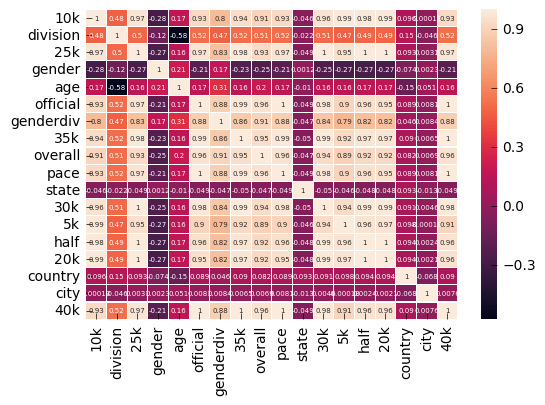

In [319]:
sns.heatmap(df.corr(), linewidths=.1, annot=True, annot_kws={'size': 5})
plt.show()

In [320]:
#as expected there are a lot of highly correlated so lets try pca to cut down 
#the number of variables without getting rid of stats
pca = PCA(n_components = 'mle', svd_solver = 'full')
pca.fit(df)
pca.explained_variance_ratio_

array([  9.24935668e-01,   2.85683168e-02,   2.79207623e-02,
         1.85536654e-02,   1.02413798e-05,   7.09150839e-06,
         3.09580138e-06,   7.49892451e-07,   2.57371737e-07,
         8.51439782e-08,   3.23088492e-08,   1.51615446e-08,
         8.72487712e-09,   8.32603091e-09,   1.37212265e-09,
         4.61118268e-10,   1.16998612e-10])

In [321]:
#onlys 4 components from 18 summarizes 99.998% of the data
pca.explained_variance_ratio_[0:4].sum()

0.99997841243036323

In [322]:
pca_df = pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(17)])
pca_df.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16
0,-17831.547121,648.642420,-792.063033,-523.039675,10.648203,-146.445656,16.006615,4.366504,5.906479,-13.762527,-1.570448,-3.223609,-0.342255,-0.835990,-0.443813,-0.156417,-0.411583
1,-17822.927424,784.101086,-1039.698699,-571.396352,14.400119,-35.757258,19.585304,1.960893,-7.663177,-4.929528,-0.297554,-1.052759,0.207414,-0.483692,-0.083436,-0.012312,0.655746
2,-17839.076690,-279.092006,1091.098979,-234.678155,-42.499797,-151.974550,0.099539,3.715289,0.111055,-14.151875,-2.008731,-3.292702,-0.186136,-0.848992,-0.389713,-0.202295,-0.387324
3,-17812.656275,-650.539724,1865.389572,-115.004407,38.598596,-36.362585,31.318038,3.790547,-16.888878,-3.999261,-0.677995,-1.043885,0.031150,-0.220637,-0.111347,-0.017208,0.693119
4,-17837.963536,-158.300633,845.806964,-272.168043,9.811399,-153.347992,14.286620,3.504570,-1.318813,-13.644188,-1.970100,-3.072558,-0.100227,-0.870775,-0.419580,-0.137669,-0.384431


In [323]:
X = pca_df[['PCA0', 'PCA1', 'PCA2', 'PCA3']]

In [324]:
bandwidth = estimate_bandwidth(X, n_samples = 3000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


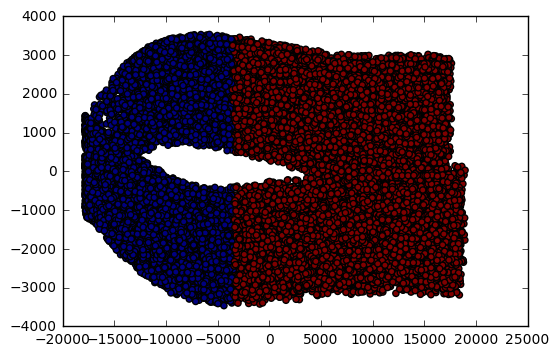

In [325]:
plt.scatter(X.PCA0, X.PCA1, c=labels)
plt.show()

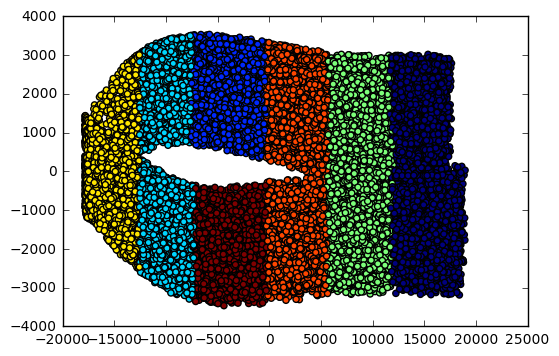

In [326]:
#for the supervised methods I am going to use trial and error for clusters until I reach the max number that doesn't have any
#errant data. that number was 6
y_predk = KMeans(n_clusters=7).fit_predict(X)

plt.scatter(X.PCA0, X.PCA1, c=y_predk)
plt.show()

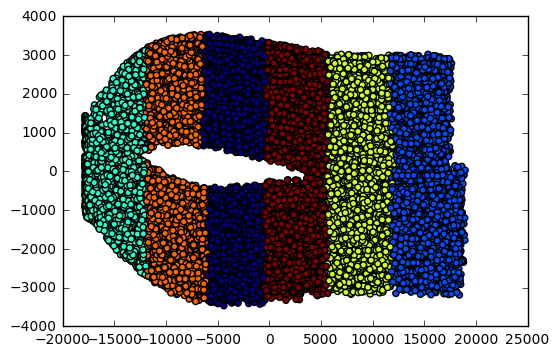

In [327]:
y_predk = KMeans(n_clusters=6).fit_predict(X)

plt.scatter(X.PCA0, X.PCA1, c=y_predk)
plt.show()

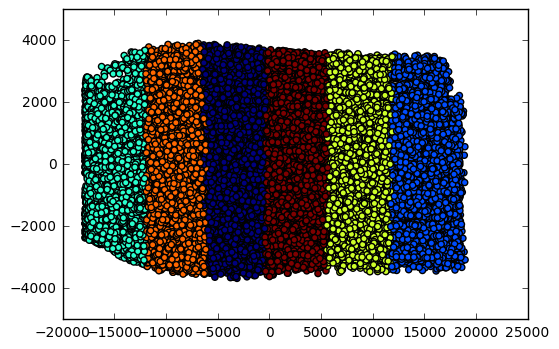

In [328]:
plt.scatter(X.PCA0, X.PCA2, c=y_predk)
plt.show()

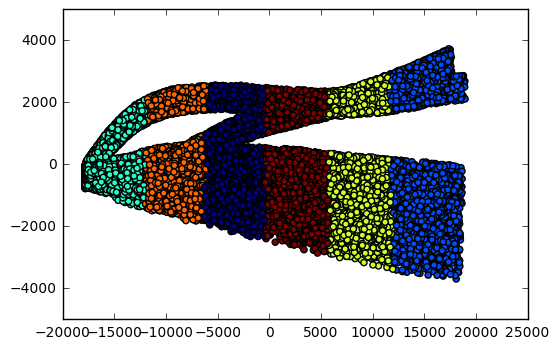

In [329]:
plt.scatter(X.PCA0, X.PCA3, c=y_predk)
plt.show()

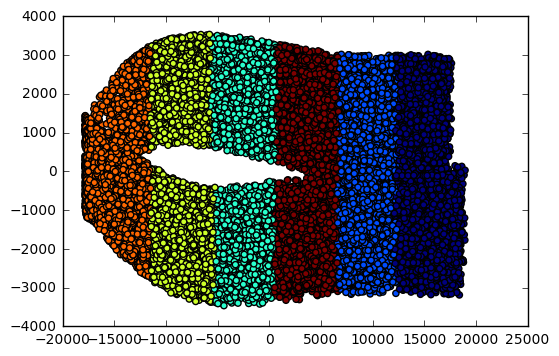

In [330]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=6,
    batch_size=500)
minibatchkmeans.fit(X)

# Add the new predicted cluster memberships to the data frame.
y_pred = minibatchkmeans.predict(X)

plt.scatter(X.PCA0, X.PCA1, c=y_pred)
plt.show()

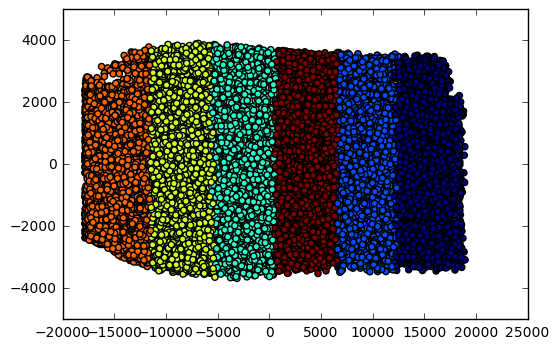

In [331]:
plt.scatter(X.PCA0, X.PCA2, c=y_pred)
plt.show()

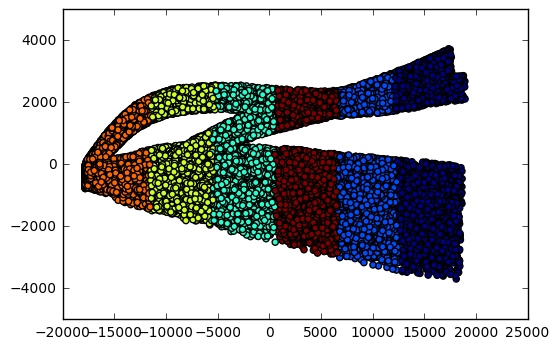

In [332]:
plt.scatter(X.PCA0, X.PCA3, c=y_pred)
plt.show()

In [333]:
#these two methods produce much more clusters lets check the difference
pd.crosstab(y_predk,y_pred)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,0,0,4620,691,0,0
1,4868,521,0,0,0,0
2,0,0,0,0,4907,0
3,0,4435,0,0,0,877
4,0,0,0,4929,470,0
5,0,0,884,0,0,4447


In [334]:
#both methods are very similar with a 90% match or more on all groups. lets check which method splits the groups most evenly and 
#use that one
df['cluster'] = y_predk
df['cluster0'] = y_pred

In [335]:
df['cluster'].groupby(df['cluster']).count()

cluster
0    5311
1    5389
2    4907
3    5312
4    5399
5    5331
Name: cluster, dtype: int64

In [336]:
df['cluster0'].groupby(df['cluster0']).count()

cluster0
0    4868
1    4956
2    5504
3    5620
4    5377
5    5324
Name: cluster0, dtype: int64

In [337]:
#cluster is a lot more even across the board
df = df.drop('cluster0',1)

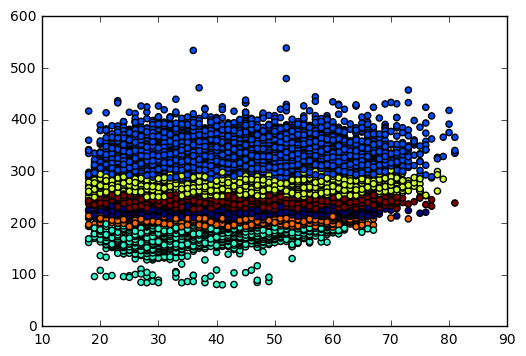

In [338]:
#now lets look at the data
plt.scatter(df.age, df.official, c=df.cluster)
plt.show()

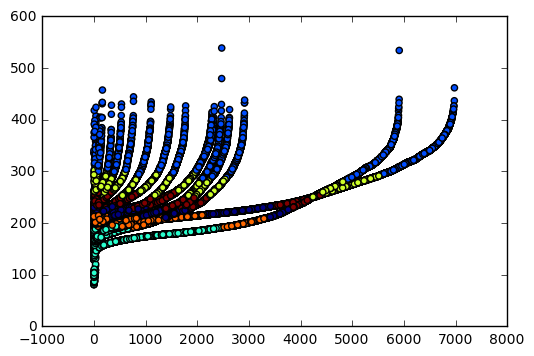

In [339]:
plt.scatter(df.division, df.official, c=df.cluster)
plt.show()

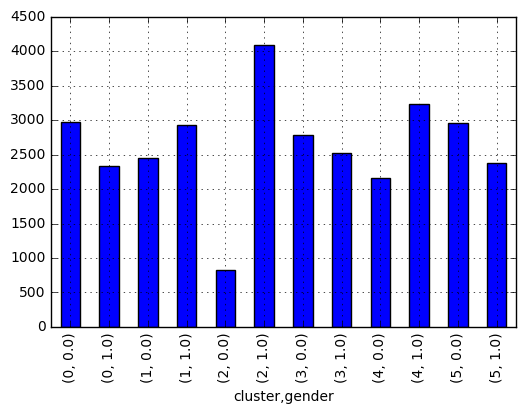

In [340]:
df.groupby(['cluster', 'gender'])['age'].count().plot.bar(grid=True)
plt.show()

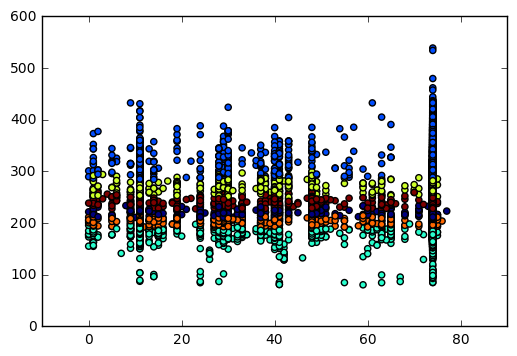

In [341]:
plt.scatter(df.country, df.official, c=df.cluster)
plt.show()

In [342]:
df['agegroup'] = df['age']
df['agegroup'].loc[df['agegroup'] < 25 ] = 1000
df['agegroup'].loc[df['agegroup'] < 35 ] = 2000
df['agegroup'].loc[df['agegroup'] < 45 ] = 3000
df['agegroup'].loc[df['agegroup'] < 55 ] = 4000
df['agegroup'].loc[df['agegroup'] < 65 ] = 5000
df['agegroup'].loc[df['agegroup'] < 150 ] = 6000

C:\Users\jmfra\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


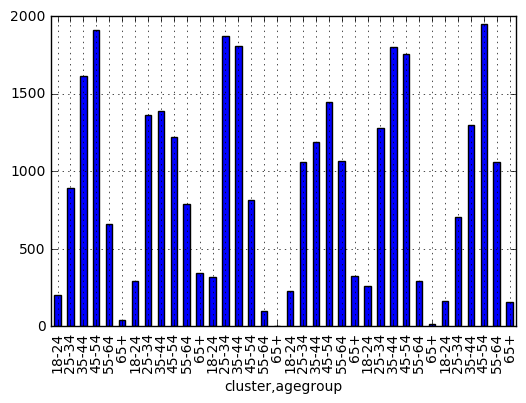

In [343]:
df.groupby(['cluster', 'agegroup'])['gender'].count().plot.bar(grid=True)
plt.xticks(np.arange(36), ('18-24','25-34','35-44','45-54','55-64','65+',
                           '18-24','25-34','35-44','45-54','55-64','65+',
                           '18-24','25-34','35-44','45-54','55-64','65+',
                           '18-24','25-34','35-44','45-54','55-64','65+',
                           '18-24','25-34','35-44','45-54','55-64','65+',
                           '18-24','25-34','35-44','45-54','55-64','65+'))
plt.show()

In [344]:
df = df.drop(['cluster', 'agegroup'], 1)

In [345]:
#now lets rerun on the whole dataset and compare
bandwidth = estimate_bandwidth(df, n_samples = 6000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


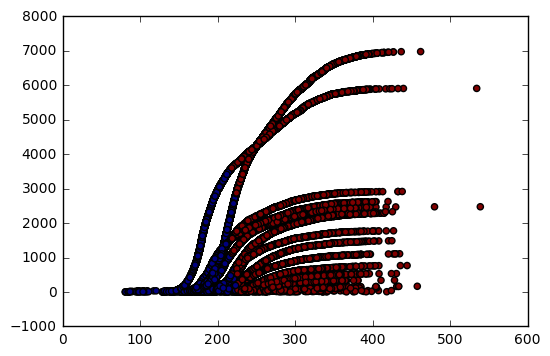

In [346]:
plt.scatter(df.official, df.division, c=labels)
plt.show()

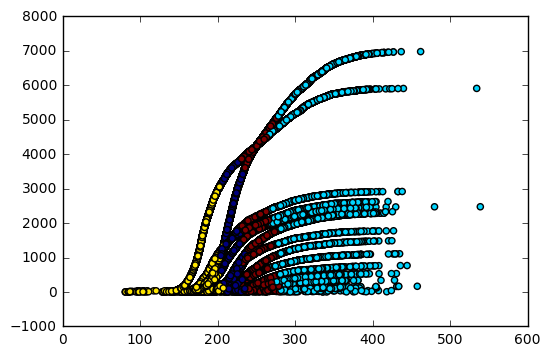

In [360]:
# Calculate predicted values.
y_predk = KMeans(n_clusters=4).fit_predict(df)

# Plot the solution.
plt.scatter(df.official, df.division, c=y_predk)
plt.show()

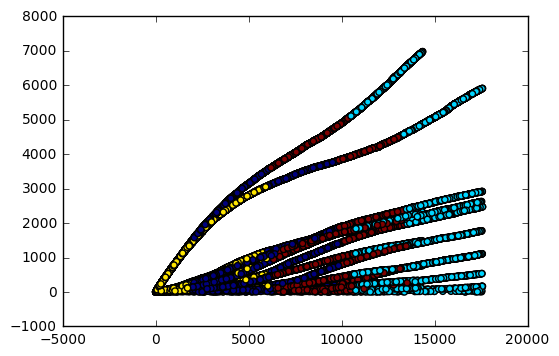

In [361]:
plt.scatter(df.genderdiv, df.division, c=y_predk)
plt.show()

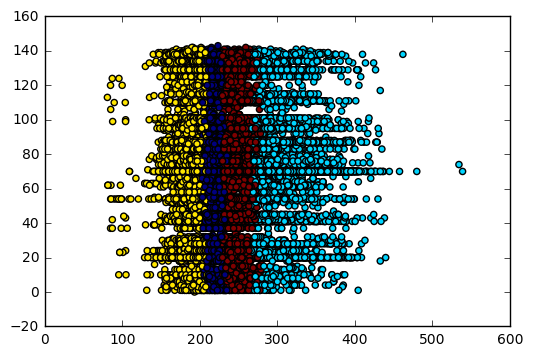

In [362]:
plt.scatter(df.official, df.state, c=y_predk)
plt.show()

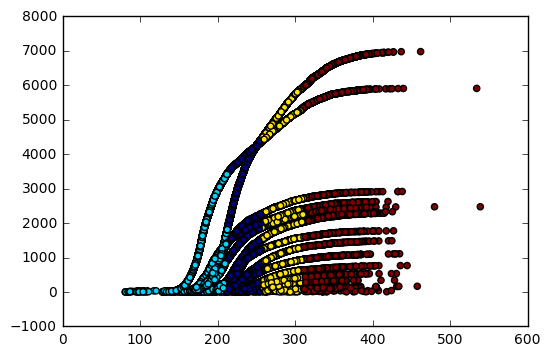

In [363]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=500)
minibatchkmeans.fit(X)

# Add the new predicted cluster memberships to the data frame.
y_pred = minibatchkmeans.predict(X)

plt.scatter(df.official, df.division, c=y_pred)
plt.show()

In [364]:
pd.crosstab(y_predk,y_pred)

col_0,0,1,2,3
row_0,,,,
0,6119,1928,0,0
1,0,0,4225,3567
2,0,7981,0,0
3,5288,0,2541,0


In [365]:
X = df[['official', 'age']]
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, n_samples = 3000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


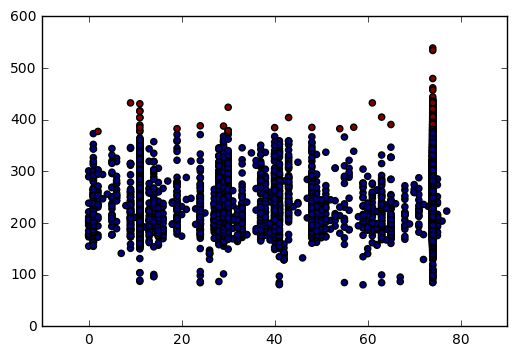

In [366]:
plt.scatter(df.country, df.official, c=labels)
plt.show()

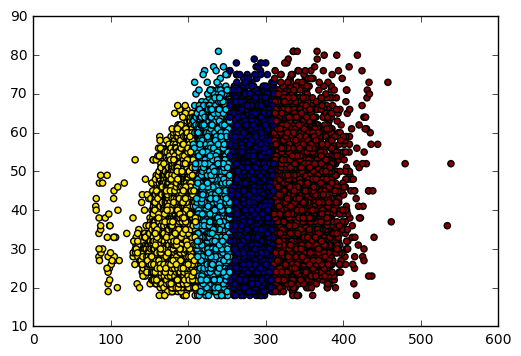

In [367]:
# Calculate predicted values.
y_predk = KMeans(n_clusters=4).fit_predict(X)

# Plot the solution.
plt.scatter(df.official, df.age, c=y_predk)
plt.show()

In [ ]:
plt.scatter(df.genderdiv, df.division, c=y_predk)
plt.show()

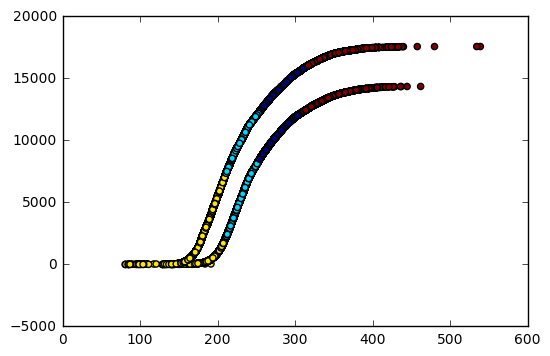

In [369]:
plt.scatter(df.official, df.genderdiv, c=y_predk)
plt.show()